In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using StatsBase

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,Γ::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(sqrt(Δt*2*Γ)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end
function TrayectoriasOH(n::Int64)
    L=Vector{Array{Float64,1}}(undef,n)
    for i=1:n
        L[i]=OUH(x0,γ,t,Δt,Γ,cte)
    end
    return L
end

TrayectoriasOH (generic function with 1 method)

In [3]:
σ(x)=sqrt((Γ/γ)*(1-exp(-2*γ*x)))
μ(x)=cte+(x0-cte)*exp(-γ*x)

μ (generic function with 1 method)

In [4]:
N=100.0
Δt=0.001
t=0:Δt:N

Γ=2.0e0
γ=1.0e-1
x0=-10.0
cte=20.0


20.0

In [5]:
@time L=TrayectoriasOH(100);

  0.223524 seconds (220.94 k allocations: 87.709 MiB, 6.52% gc time)


In [6]:
@time begin
    plot(t,μ.(t),ribbon=3*σ.(t),legend=false)
    plot!(t,L,xlabel="t", ylabel="x")
    plot!(t,μ.(t),lw = 3,color="blue")
    savefig("O-H_promedio_error.png");
end

 22.713405 seconds (32.99 M allocations: 2.233 GiB, 2.99% gc time)


In [7]:
P(x,t)=sqrt(γ/(2*π*Γ*(1-exp(-2*γ*t))))*exp( (-γ/(2*Γ*(1-exp(-2*γ*t))))*(x-(cte+(x0-cte)*exp(-γ*t)))^2)

P (generic function with 1 method)

In [8]:
xx=-15:0.1:30

-15.0:0.1:30.0

In [9]:
j=[0.0001,0.1,1,3,5,8,13,300]
plot(xx,P.(xx,j[1]),ylims=(0,0.4),label="t=$(j[1])")
plot!(xx,P.(xx,j[2]),ylims=(0,0.4),label="t=$(j[2])")
plot!(xx,P.(xx,j[3]),ylims=(0,0.4),label="t=$(j[3])")
plot!(xx,P.(xx,j[4]),ylims=(0,0.4),label="t=$(j[4])")
plot!(xx,P.(xx,j[5]),ylims=(0,0.4),label="t=$(j[5])")
plot!(xx,P.(xx,j[6]),ylims=(0,0.4),label="t=$(j[6])")
plot!(xx,P.(xx,j[7]),ylims=(0,0.4),label="t=$(j[7])")
plot!(xx,P.(xx,j[8]),ylims=(0,0.4),label="t=$(j[8])")
savefig("FK_OH.png");


 37.572514 seconds (33.14 M allocations: 1.067 GiB, 0.39% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\OH.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\OH.gif")
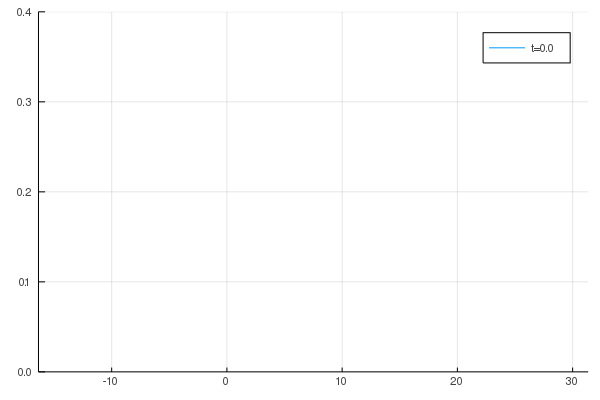

In [10]:
@time begin    
    anim= @animate for j=range(0,stop=75,length=1000)
        plot(xx,P.(xx,j),ylims=(0,0.4),label="t=$(j)")    
    end
    gif(anim,"./OH.gif", fps=60)
end

In [11]:
range(0,stop=2*pi,length=10)

0.0:0.6981317007977318:6.283185307179586

In [12]:
using QuadGK

In [13]:
μ0=3.0
ϵ=0.01
δ(x)=((ϵ*sqrt(2*π))^(-1))*exp(-(x-μ0)^2/(2*ϵ^2))


δ (generic function with 1 method)

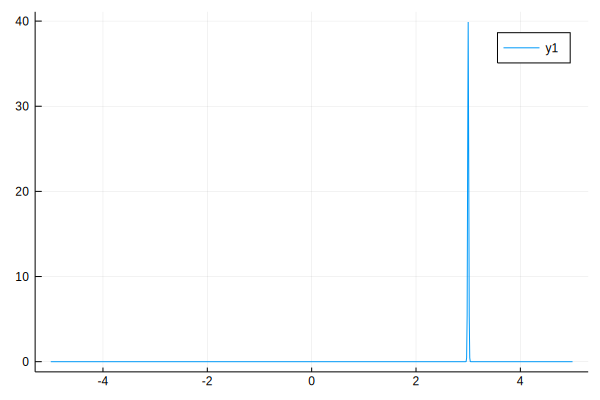

In [14]:
plot(-5:0.01:5,x->δ(x))

In [15]:
f(x)=δ(x)*exp(x)
quadgk(f, -Inf, Inf)

(0.0, 0.0)

In [16]:
exp(10)

22026.465794806718

In [17]:
? Normal()

```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


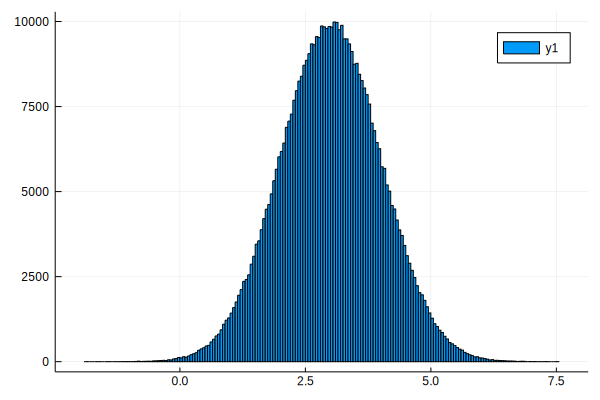

In [18]:
histogram(rand(Normal(3,1),500000))

In [19]:
ϕ(k,t,Δs=0.001)=atan((Δs*sqrt(k^2+t^2))/(1-((k^2+t^2)*Δs*0.5)))

ϕ (generic function with 2 methods)

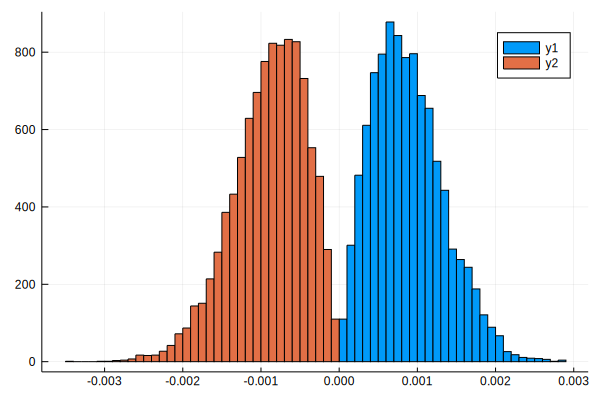

In [20]:
μ0=0
σ0=1/sqrt(2)
tiradas=10000
histogram(ϕ.(rand(Normal(μ0,σ0),tiradas),rand(Normal(μ0,σ0),tiradas)),normalized=true)
histogram!(-1*ϕ.(rand(Normal(μ0,σ0),tiradas),rand(Normal(μ0,σ0),tiradas)),normalized=true)

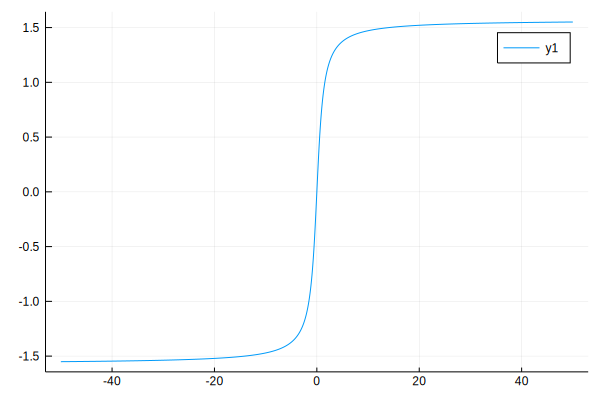

In [21]:
plot(-50:0.01:50,x->atan(x))